# Cytoscape and igraph
[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/cytoscape/cytoscape-automation/blob/master/for-scripters/Python/Cytoscape-and-iGraph.ipynb)

**by Kozo Nishida, Alexander Pico, Barry Demchak**

**py4cytoscape 1.3.0**

This notebook will show you how to convert networks between igraph and Cytoscape.

## Prerequisites
There are two options for using py4cytoscape.

1. **LOCAL** Cytoscape (3.9.1 or greater) + **Local** Jupyter environment (including py4cytoscape).
2. **LOCAL** Cytoscape (3.9.1 or greater) + **Remote** Jupyter environment (including py4cytoscape).

### Setup required for option **1.**

- Install Cytoscape on your PC. (See https://cytoscape.org/download.html)
- Install Jupyter on your PC. (See https://jupyter.org/install)
- Install py4cytoscape with `pip install py4cytoscape` on your PC.

### Setup required for option **2.**

- Install Cytoscape on your PC. (See https://cytoscape.org/download.html)
- Run the next cell.
  The next cell installs py4cytoscape in the **REMOTE** Jupyter environment and set up [Jupyter-Bridge](https://github.com/cytoscape/jupyter-bridge).
  (If you use your **LOCAL** Jupyter environment in **your desktop machine** same with Cytoscape, you can **skip** the next cell.)

In [ ]:
import requests
exec(requests.get("https://raw.githubusercontent.com/cytoscape/jupyter-bridge/master/client/p4c_init.py").text)
IPython.display.Javascript(_PY4CYTOSCAPE_BROWSER_CLIENT_JS) # Start browser client

### Sanity test to verify Cytoscape connection

**NOTE: To run this notebook, you must manually start Cytoscape first – don’t proceed until you have started Cytoscape.**

By now, the connection to Cytoscape should be up and available. To verify this, try a simple operation that doesn't alter the state of Cytoscape.

In [3]:
import py4cytoscape as p4c
p4c.cytoscape_ping()
p4c.cytoscape_version_info()

You are connected to Cytoscape!


{'apiVersion': 'v1',
 'cytoscapeVersion': '3.9.1',
 'automationAPIVersion': '1.4.0',
 'py4cytoscapeVersion': '1.3.0'}

## From igraph to Cytoscape

The igraph package is a popular network tool among Python users. With py4cytoscape, you can easily translate igraph networks to Cytoscape networks!

Here is a basic igraph network construction from the Graph.DataFrame docs, https://igraph.org/python/doc/tutorial/generation.html#from-pandas-dataframe-s

In [4]:
import pandas as pd
from igraph import Graph

actors = pd.DataFrame(data={'name': ["Alice", "Bob", "Cecil", "David", "Esmeralda"],
                             'age': [48,33,45,34,21],
                             'gender': ["F","M","F","M","F"]
                             })

relations = pd.DataFrame(data={'from': ["Bob", "Cecil", "Cecil", "David", "David", "Esmeralda"],
                               'to': ["Alice", "Bob", "Alice", "Alice", "Bob", "Alice"],
                               'same_dept': [False, False, True, False, False, True],
                               'friendship': [4,5,5,2,1,1],
                               'advice': [4,5,5,4,2,3]
                               })

ig = Graph.DataFrame(relations, directed=True, vertices=actors)

You now have an igraph network, ig.
In order to translate the network together with all vertex (node) and edge attributes over to Cytoscape, simply use:

In [5]:
p4c.create_network_from_igraph(ig, "myIgraph")

Applying default style...
Applying preferred layout


124

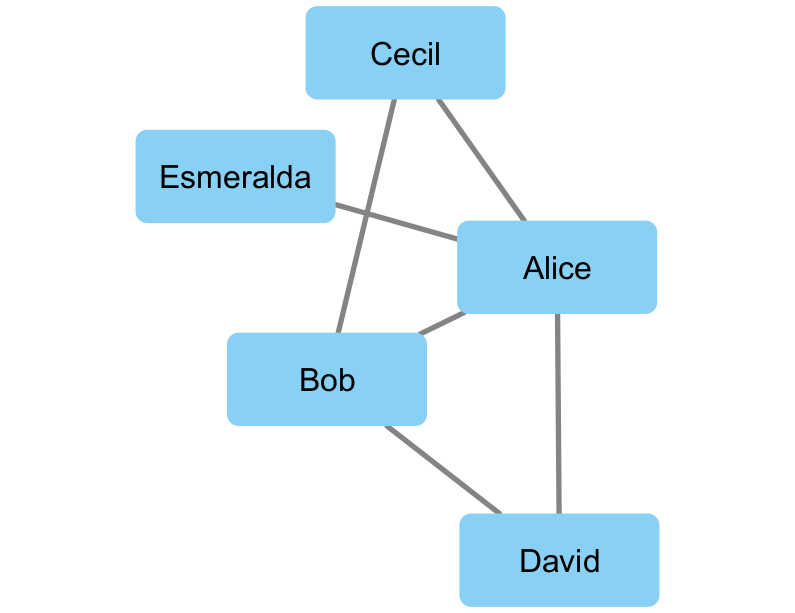

In [6]:
p4c.notebook_export_show_image()

## From Cytoscape to igraph

Inversely, you can use create_igraph_from_network() in py4cytoscape to retrieve vertex (node) and edge DataFrames to construct an igraph network.


In [7]:
ig2 = p4c.create_igraph_from_network("myIgraph")

Compare the round-trip result for yourself…

In [8]:
print(ig)

IGRAPH DN-- 5 6 --
+ attr: age (v), gender (v), name (v), advice (e), friendship (e), same_dept
  (e)
+ edges (vertex names):
Bob->Alice, Cecil->Bob, Cecil->Alice, David->Alice, David->Bob,
Esmeralda->Alice


In [9]:
print(ig2)

IGRAPH DN-- 5 6 --
+ attr: age (v), gender (v), id (v), name (v), selected (v), shared name (v),
  advice (e), data.key.column (e), friendship (e), interaction (e), name (e),
  same_dept (e), selected (e), shared interaction (e), shared name (e), source
  (e), target (e)
+ edges (vertex names):
Bob->Alice, Cecil->Bob, Cecil->Alice, David->Alice, David->Bob,
Esmeralda->Alice


Note that a few additional attributes are present which are used by Cytoscape to support node/edge selection and network collections.

**Also note: All networks in Cytoscape are implicitly modeled as *directed*. This means that if you start with an *undirected* network in igraph and then convert it round-trip (like described above), then you will end up with a *directed* network.**
